In [121]:
import os
import pandas as pd
import pdb
import time
from sklearn.preprocessing import minmax_scale

def blend(path, select_to_essemble, weights=None, minmaxscale=False, shortenname=False):
    if weights is not None:
        if type(weights) != dict:
            raise ValueError('weights must be a dict or None')
        if int(sum(weights.values())*10000)+1 != 10000: # sometimes sum can be 0.9999999999999999, which is 1 essentially
            raise ValueError('sum of weights must be 1, but you have: {}'.format(sum(weights.values())))
        if len(select_to_essemble) != len(weights):
            raise ValueError('when weight is not None, it must have length of select_to_essemble')
    xgb_topn_repo = {}   
    cnt = 0
    for filename in os.listdir(path):
        #pdb.set_trace()
        #score += float(item.split('_')[-1])
        select = None
        if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
            select = filename
        else:
            if filename in select_to_essemble:
                select = filename
            else:
                continue
        print('selected: ' + select)
        tmp = pd.read_csv(path+select)
        if shortenname:
            if select.split('.')[-1] == 'gz':
                shortened_name = select.split('.')[-3].split('_')[-1]
            else:
                shortened_name = select.split('.')[-2].split('_')[-1]
            xgb_topn_repo[shortened_name] = tmp
        else:
            xgb_topn_repo[select] = tmp
#         import pdb
#         pdb.set_trace()
        if cnt == 0:
            label_cols = list(tmp.columns)
            label_cols.pop(0) # remove 'id'
        if minmaxscale:
            tmp[label_cols] = minmax_scale(tmp[label_cols].values)  
        if weights is not None:
            tmp[label_cols] = tmp[label_cols].applymap(lambda x: x*weights[select])
        if cnt == 0:
            preds = tmp
        else:
            preds[label_cols] += tmp[label_cols]  
        cnt += 1

    print(str(cnt)+' results selected')
    if weights is None:
        preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)
    return preds, label_cols, xgb_topn_repo, cnt

In [122]:
# 9873_MAD131330181808_ensemble_1520437955_1520005508_1520572538_1520444908_1520438638_1520460207_6_1520573203.csv.gz
# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
# 9857_xgb_ensemble_5_1520005508.csv.gz',
# 9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz
# 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
# 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
# 9832_rnn_w_conv_twitter_1520460207.csv']


# 9873_MAD151524181810_ensemble_1520437955_1520005508_1520560823_1520444908_1520438638_1520460207_6_1520562334.csv.gz
# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
# 9857_xgb_ensemble_5_1520005508.csv.gz',
# 9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz',
# 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
# 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
# 9832_rnn_w_conv_twitter_1520460207.csv']


# 9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz
# 9845_rnn_w_conv_lev_d300_b512_ep8_1520569282.csv
# 9851_rnn_w_conv_lev_d300_ep6_1520559231.csv
# 9846_rnn_w_conv_lev_d300_ep8_1520560403.csv
# 9846_rnn_w_conv_lev_d300_ep5_1520558417.csv


# 9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz
# 9851_rnn_w_conv_lev_d300_ep6_1520559231.csv
# 9846_rnn_w_conv_lev_d300_ep8_1520560403.csv
# 9846_rnn_w_conv_lev_d300_ep5_1520558417.csv


# 9869_xgb_meta_ensemble_1520435392_1520460999__2_1520461403.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz


# 9868_xgb_meta_ensemble_1520435392_1520435392_2_1520446721.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz


# 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv
# 3. 9832_rnn_w_conv_twitter_1520460207.csv


# 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv


# 9862_xgb_meta_ensemble_1520437955_1520005508_2_1520438218.csv.gz
# 1. 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz


# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv
# 3. 9839_sub_FastText_cleaned_200_300_50_50_0.1_32_6_1518834132.csv


# 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz 
# 1. 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz


# 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz: 
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv

In [143]:
path = 'StackPreds/TopN_XGB/'
   
#select_to_essemble = [] # this will affect the scatter plotting later
#select_to_essemble = #['9836_noscaled_xgb_top8__0.98852106_1520431835.csv',
select_to_essemble = ['9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz',
                      '9857_xgb_ensemble_5_1520005508.csv.gz',
                      '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz',  
                      #'9853_lev_ensemble_1520559231_1520560403_1520558417_3_1520560823.csv.gz',
                      '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv',
                     '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv',
                     '9832_rnn_w_conv_twitter_1520460207.csv']

weights = {
    '9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz':0.13,
    '9857_xgb_ensemble_5_1520005508.csv.gz':0.13,
    '9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz':0.3,#0.24,
    '9842_rnn_w_conv_840B_300d_ep4_1520444908.csv':0.18,
    '9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv':0.18,
    '9832_rnn_w_conv_twitter_1520460207.csv':0.08,
}

#preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble)
preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble, weights, minmaxscale=False, shortenname=True)

selected: 9856_lev_ensemble_1520569282_1520559231_1520560403_1520558417_4_1520572538.csv.gz
selected: 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
selected: 9832_rnn_w_conv_twitter_1520460207.csv
selected: 9857_xgb_ensemble_5_1520005508.csv.gz
selected: 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
selected: 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv
6 results selected


In [133]:
import matplotlib.pyplot as plt

In [134]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [135]:
preds.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.990030,0.214977,0.955098,0.132344,0.906086,0.466329
1,0000247867823ef7,0.000420,0.000036,0.000167,0.000010,0.000145,0.000033
2,00013b17ad220c46,0.003637,0.000205,0.000879,0.000075,0.001137,0.000451


In [136]:
list(xgb_topn_repo)

['9845_rnn_w_conv_lev_d300_b512_ep8_1520569282.csv',
 '9851_rnn_w_conv_lev_d300_ep6_1520559231.csv',
 '9846_rnn_w_conv_lev_d300_ep8_1520560403.csv',
 '9846_rnn_w_conv_lev_d300_ep5_1520558417.csv']

In [137]:
from toxic_utils import scatter_per_label
%matplotlib inline

toxic
severe_toxic
obscene
threat
insult
identity_hate
['9845_rnn_w_conv_lev_d300_b512_ep8_1520569282.csv', '9851_rnn_w_conv_lev_d300_ep6_1520559231.csv', '9846_rnn_w_conv_lev_d300_ep8_1520560403.csv', '9846_rnn_w_conv_lev_d300_ep5_1520558417.csv']


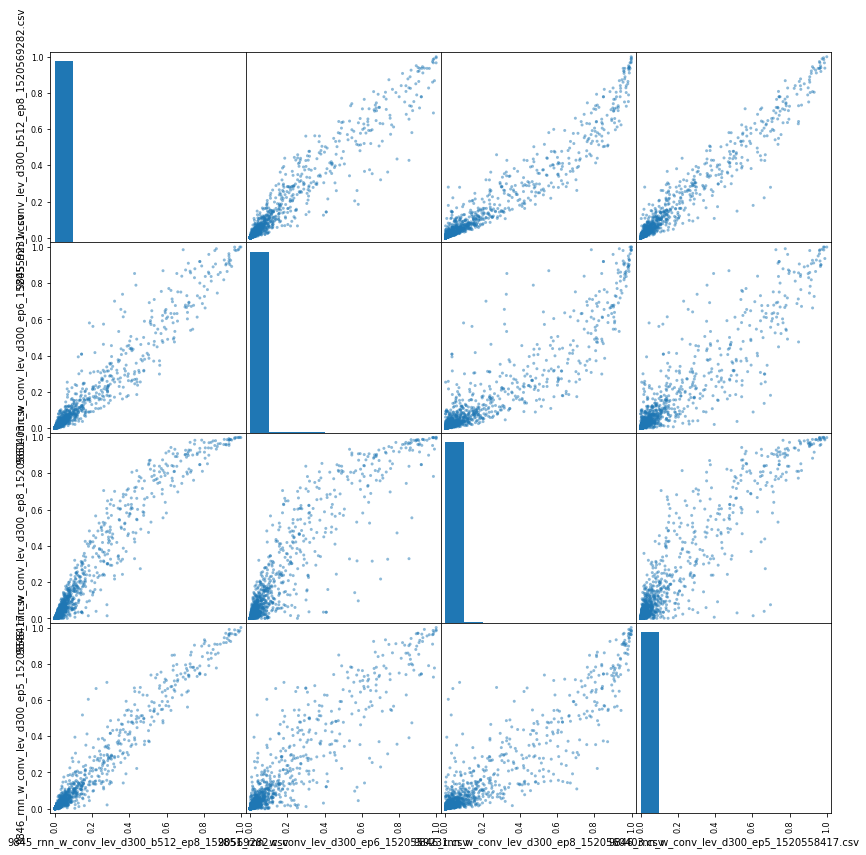

In [138]:
scatter_per_label(xgb_topn_repo, 'threat', 30000)

In [144]:
list(xgb_topn_repo)

['1520572538',
 '1520444908',
 '1520460207',
 '1520005508',
 '1520437955',
 '1520438638']

In [145]:
tempid = ''
for selected in select_to_essemble:
    temp = selected.split('_')[-1].split('.')[0]
    print(temp)
    tempid += temp + '_'
print(tempid)

1520437955
1520005508
1520572538
1520444908
1520438638
1520460207
1520437955_1520005508_1520572538_1520444908_1520438638_1520460207_


In [146]:
essemble_name = 'MAD_ensemble_1520437955_1520005508_1520572538_1520444908_1520438638_1520460207'
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, int(time.time())), index=False, compression='gzip')